In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 Parte I - Outliers

Linha  - Importar ficheiro Carros3 + apagar colunas

In [75]:
path = ('/content/carros3_AnaCintiaOliveira.csv')
carros3=pd.read_csv(path)

In [76]:
print(carros3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             200 non-null    object 
 1   fuel-type        200 non-null    object 
 2   aspiration       200 non-null    object 
 3   num-of-doors     200 non-null    object 
 4   body-style       200 non-null    object 
 5   drive-wheels     200 non-null    object 
 6   engine-location  200 non-null    object 
 7   wheel-base       200 non-null    float64
 8   length           200 non-null    float64
 9   width            200 non-null    float64
 10  height           200 non-null    float64
 11  curb-weight      200 non-null    int64  
 12  engine-size      200 non-null    int64  
 13  horsepower       200 non-null    float64
 14  price            200 non-null    int64  
 15  width_std        200 non-null    float64
 16  mean_width       200 non-null    float64
 17  height_log      

In [77]:
carros3 = carros3.drop(columns=['width_std','mean_width','height_log','price_decile'])

Linha 2

In [78]:
carros3.describe()

,wheel-base,length,width,height,curb-weight,engine-size,horsepower,price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,98.792000,0.493866,65.887500,4.002342,2556.760000,126.965000,103.404040,13203.415000
std,6.081171,0.184357,2.106628,0.044658,518.361966,41.631716,37.459236,7966.833912
min,86.600000,0.000000,60.300000,3.887730,1488.000000,61.000000,48.000000,5118.000000
25%,94.500000,0.381716,64.100000,3.970292,2163.000000,97.750000,70.000000,7775.000000
50%,96.950000,0.479104,65.500000,4.009150,2417.000000,120.000000,95.000000,10270.000000
75%,102.400000,0.632836,66.675000,4.034683,2928.250000,142.000000,116.000000,16500.750000
max,120.900000,1.000000,72.000000,4.107590,4066.000000,326.000000,262.000000,45400.000000


In [79]:
#inicialmente estava a realizar comandos individuais para cada variavel. Pesquisei forma de fazer automático para todas as variáveis quantitativas, em vez de uma a uma

variaveis_quantitativas= ['wheel-base','length','width','height','curb-weight','engine-size','horsepower','price']

for var in variaveis_quantitativas:
    Q1 = carros3[var].quantile(0.25)
    Q3 = carros3[var].quantile(0.75)
    IQR = Q3 - Q1

    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR

     # Filtra os registros que são outliers
    outliers = carros3[(carros3[var] < lim_inf) | (carros3[var] > lim_sup)]

    if outliers.empty:
        print(f"A variável '{var}' NÃO tem outliers.")
    else:
        print(f"A variável '{var}' AINDA tem {len(outliers)} outliers.")


A variável 'wheel-base' AINDA tem 3 outliers.
A variável 'length' AINDA tem 1 outliers.
A variável 'width' AINDA tem 9 outliers.
A variável 'height' NÃO tem outliers.
A variável 'curb-weight' NÃO tem outliers.
A variável 'engine-size' AINDA tem 10 outliers.
A variável 'horsepower' AINDA tem 5 outliers.
A variável 'price' AINDA tem 14 outliers.


Linha 3

In [80]:
#length é a variável com menor número de outliers

Q1 = carros3['length'].quantile(0.25)
Q3 = carros3['length'].quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR
#precisei de conseguir visualizar o outlier que estava a eliminar, para todo o processo fazer mais lógica para mim nesta fase

# Identificar outliers
length_outliers= carros3[(carros3 ['length'] < lim_inf) | (carros3['length'] > lim_sup)]

# Número de outliers
num_outliers = len(length_outliers)

print(f"Número de outliers: {num_outliers}")
print(f"Outliers encontrados: {length_outliers}")

Número de outliers: 1
Outliers encontrados:          make fuel-type aspiration num-of-doors body-style drive-wheels  \
91  chevrolet       gas        std          two  hatchback          fwd   

   engine-location  wheel-base  length  width    height  curb-weight  \
91           front        88.4     0.0   60.3  3.992681         1488   

    engine-size  horsepower  price  
91           61        48.0   5151  


In [81]:
#eliminar outliers
carros3=carros3.drop(length_outliers.index)

Linha 4

In [82]:
#Verificação de eliminação de outlier
Min_length= carros3['length'].min()
print(Min_length)

0.0522388059701492


Linha 5

In [83]:
#estandardização price

std_quantitativas= ['wheel-base','length','width','height','curb-weight','engine-size','horsepower','price']

for var in std_quantitativas:
    media_quant = carros3[var].mean()
    desvio_quant = carros3[var].std()

    nome_colunas_z= f'{var}_z'
    carros3[nome_colunas_z] = (carros3[var] - media_quant) / desvio_quant


    outliers_std = carros3.loc[(carros3[nome_colunas_z] > 3) | (carros3[nome_colunas_z] < -3)]

    num_outliers_std = len(outliers_std)
    print(f"Variável '{var}': {num_outliers_std} outliers")

Variável 'wheel-base': 1 outliers
Variável 'length': 0 outliers
Variável 'width': 0 outliers
Variável 'height': 0 outliers
Variável 'curb-weight': 0 outliers
Variável 'engine-size': 5 outliers
Variável 'horsepower': 1 outliers
Variável 'price': 3 outliers


Linha 6

In [84]:
#horsepower
carros3['horsepower_lim'] = carros3['horsepower_z'].clip(lower=-3, upper=3)

# wheel-base
carros3['wheel-base_lim'] = carros3['wheel-base_z'].clip(lower=-3, upper=3)

In [85]:
carros3.describe()

,wheel-base,length,width,height,curb-weight,engine-size,horsepower,price,wheel-base_z,length_z,width_z,height_z,curb-weight_z,engine-size_z,horsepower_z,price_z,horsepower_lim,wheel-base_lim
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,1.990000e+02,1.990000e+02,1.990000e+02,1.990000e+02,1.990000e+02,1.990000e+02,199.000000,1.990000e+02,199.000000,199.000000
mean,98.844221,0.496347,65.915578,4.002390,2562.130653,127.296482,103.682453,13243.879397,-2.124487e-15,3.570567e-17,1.035464e-15,-2.767189e-15,1.071170e-16,1.428227e-16,0.000000,3.570567e-17,-0.006227,-0.003240
std,6.051384,0.181442,2.074085,0.044766,514.060576,41.471270,37.345685,7966.296064,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,0.977063,0.989117
min,86.600000,0.052239,61.800000,3.887730,1713.000000,70.000000,52.000000,5118.000000,-2.023375e+00,-2.447664e+00,-1.984286e+00,-2.561334e+00,-1.651810e+00,-1.381595e+00,-1.383894,-1.020032e+00,-1.383894,-2.023375
25%,94.500000,0.383582,64.150000,3.970292,2179.500000,98.000000,70.000000,7781.500000,-7.178889e-01,-6.214957e-01,-8.512565e-01,-7.170267e-01,-7.443299e-01,-7.064284e-01,-0.901910,-6.856862e-01,-0.901910,-0.717889
50%,97.000000,0.479104,65.500000,4.009150,2420.000000,120.000000,95.000000,10295.000000,-3.047602e-01,-9.503283e-02,-2.003669e-01,1.510004e-01,-2.764862e-01,-1.759407e-01,-0.232489,-3.701694e-01,-0.232489,-0.304760
75%,102.400000,0.632836,66.750000,4.035125,2930.500000,143.000000,116.000000,16501.500000,5.875976e-01,7.522434e-01,4.023086e-01,7.312466e-01,7.165874e-01,3.786602e-01,0.329825,4.089254e-01,0.329825,0.587598
max,120.900000,1.000000,72.000000,4.107590,4066.000000,326.000000,262.000000,45400.000000,3.644750e+00,2.775835e+00,2.933546e+00,2.350009e+00,2.925471e+00,4.791354e+00,4.239246,4.036521e+00,3.000000,3.000000


Linha 7

In [86]:
#Validar observações diferentes

variaveis = ["horsepower", "wheel-base"]

# Para cada variável, verificar onde há diferença
for var in variaveis:
    var_z = f"{var}_z"
    var_lim = f"{var}_lim"

    # Cria uma Series booleana indicando onde são diferentes
    diferente = carros3[var_z] != carros3[var_lim]

    # Filtra apenas linhas onde são diferentes
    diferentes_df = carros3.loc[diferente, [var_z, var_lim]]

    print(f"\nDiferenças na variável '{var}':")
    print(diferentes_df)


Diferenças na variável 'horsepower':
    horsepower_z  horsepower_lim
90      4.239246             3.0

Diferenças na variável 'wheel-base':
    wheel-base_z  wheel-base_lim
84       3.64475             3.0


Linha 8

<Axes: >

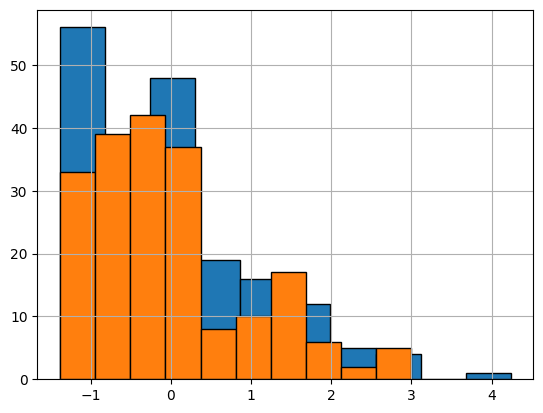

In [87]:
#comparar histogramas

carros3['horsepower_z'].hist(bins=10, edgecolor='black')
carros3['horsepower_lim'].hist(bins=10, edgecolor='black')

<Axes: >

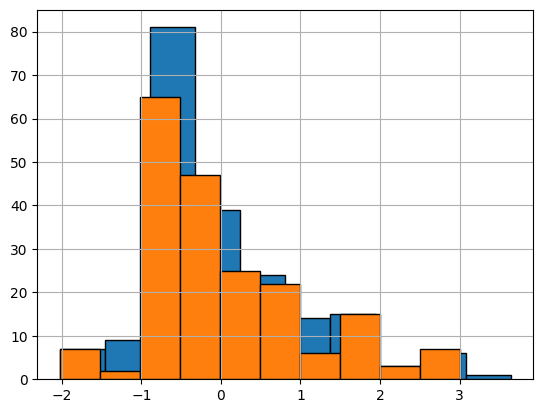

In [88]:
carros3['wheel-base_z'].hist(bins=10, edgecolor='black')
carros3['wheel-base_lim'].hist(bins=10, edgecolor='black')

Linha 9

<Axes: >

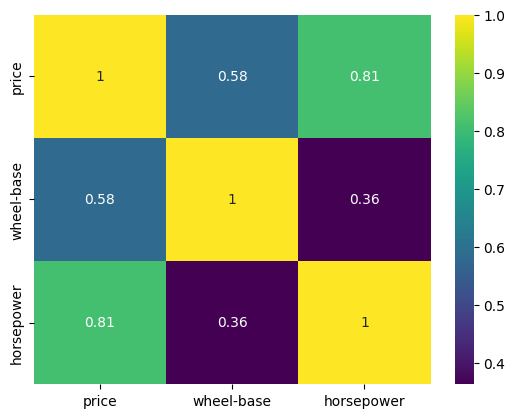

In [89]:
#correlação entre variáveis

correl = carros3[['price','wheel-base','horsepower']].corr()
sns.heatmap(correl, annot=True, cmap='viridis')

<Axes: >

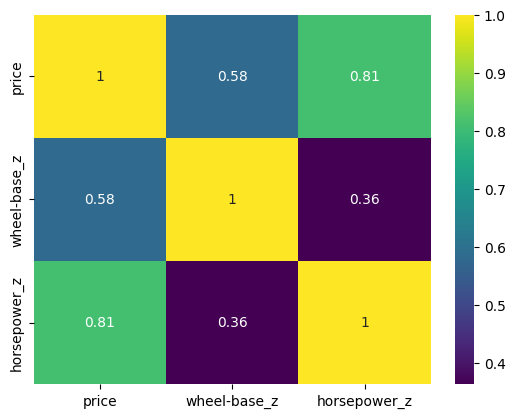

In [90]:
correl_score = carros3[['price','wheel-base_z','horsepower_z']].corr()
sns.heatmap(correl_score, annot=True, cmap='viridis')

#Concluimos que o nivel de correlação entre as váriáveis originais e limitadas se mantem o mesmo, sendo que a variável price e horsepower são as que apresentam uma maior correlação positiva entre si.

Linha 10

In [91]:
#engine-size com maior numero de outliers - criar decis

carros3['engine-size_decil'] = pd.qcut(carros3['engine-size'], q=10, labels = False) + 1


Linha 11

<Axes: >

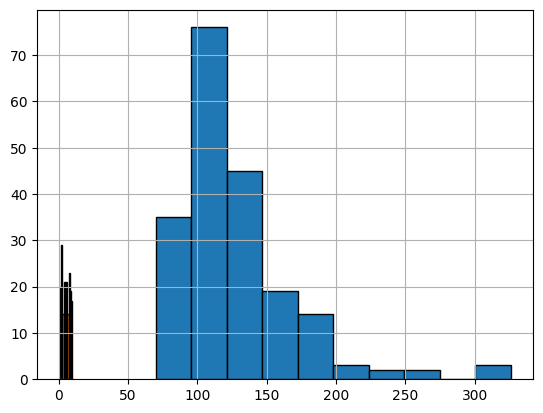

In [92]:
#comparar decis em histograma

carros3['engine-size'].hist(bins=10, edgecolor='black')
carros3['engine-size_decil'].hist(bins=10, edgecolor='black')

Linha 12

<Axes: >

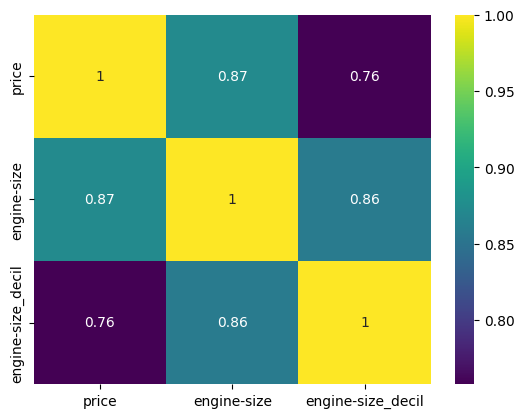

In [93]:
#correlaçao entre variavies + price. Conclusão?

correl_2 = carros3[['price','engine-size','engine-size_decil']].corr()
sns.heatmap(correl_2, annot=True, cmap='viridis')

#concluimos que o nivel de correlação entre a variavel price e a decis indica um nivel de correlação mais baixo, quando comparado com o original.

Parte II

Linha 1

In [94]:
#nova variavel numerica - num-of-doors
carros3['new_num-of-doors'] = carros3['num-of-doors'].replace({'two':2,'four':4})
carros3.head(4)

/tmp/ipython-input-94-3763218140.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  carros3['new_num-of-doors'] = carros3['num-of-doors'].replace({'two':2,'four':4})


,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,width_z,height_z,curb-weight_z,engine-size_z,horsepower_z,price_z,horsepower_lim,wheel-base_lim,engine-size_decil,new_num-of-doors
0,volkswagen,gas,std,four,sedan,fwd,front,97.3,0.456716,65.5,...,-0.200367,0.790430,-0.509922,-0.441185,-0.098605,-0.407828,-0.098605,-0.255185,4,4
1,honda,gas,std,two,sedan,fwd,front,96.5,0.417910,66.0,...,0.040703,-1.142536,-0.523539,-0.417071,-0.098605,-0.363893,-0.098605,-0.387386,5,2
2,bmw,gas,std,two,sedan,rwd,front,101.2,0.532836,64.8,...,-0.537865,0.231937,-0.325119,-0.465298,-0.071828,0.399950,-0.071828,0.389296,4,2
3,mazda,gas,std,two,hatchback,rwd,front,95.3,0.416418,65.7,...,-0.103939,-1.752203,-0.354298,-1.381595,-0.071828,-0.175600,-0.071828,-0.585688,1,2


Linha 2

In [95]:
#variáveis dummy - body-style
tabela2= pd.get_dummies(carros3, columns=['body-style'], prefix='body-style', drop_first=False)


Linha 3

In [96]:
#converter para centimetros sem casas decimais - considerando dados em polegadas

variaveis_polegadas = ['wheel-base', 'length','width','height']


for var in variaveis_polegadas:
    nome_coluna_cm = f"{var}_cm"
    carros3[nome_coluna_cm] = (carros3[var] * 2.54).round(0).astype(int)

print(carros3.head(3))

         make fuel-type aspiration num-of-doors body-style drive-wheels  \
0  volkswagen       gas        std         four      sedan          fwd   
1       honda       gas        std          two      sedan          fwd   
2         bmw       gas        std          two      sedan          rwd   

  engine-location  wheel-base    length  width  ...  horsepower_z   price_z  \
0           front        97.3  0.456716   65.5  ...     -0.098605 -0.407828   
1           front        96.5  0.417910   66.0  ...     -0.098605 -0.363893   
2           front       101.2  0.532836   64.8  ...     -0.071828  0.399950   

   horsepower_lim  wheel-base_lim  engine-size_decil  new_num-of-doors  \
0       -0.098605       -0.255185                  4                 4   
1       -0.098605       -0.387386                  5                 2   
2       -0.071828        0.389296                  4                 2   

   wheel-base_cm  length_cm  width_cm  height_cm  
0            247          1       

Linha 4

In [97]:
#converter price para euros com 2 casas decimais - considerando dados em dolares
#segundo o banco de portugal, ao dia do exercicio 1 dolar = 0.85 euros
#coloquei a taxa de cambio como variavel para ser possivel atualizar conforme o mercado sem ter de mexer diretamente no código

variaveis_preco = ['price']
taxa_cambio = 0.85

for var in variaveis_preco:
    nome_coluna_euros = f"{var}_euros"
    carros3[nome_coluna_euros] = (carros3[var] * taxa_cambio).round(2)



Linha 5

In [98]:
#com base no preço criar e 3 niveis:alto,medio e baixo
#calculei a amplitude do intervalo

price_min = carros3['price'].min()
price_max = carros3['price'].max()
amplitude_preco= price_max- price_min

#criar intervalos

intervalos = amplitude_preco/3
limite1 = price_min + intervalos
limite2 = price_min + 2 * intervalos

#classificar intervalos de precos

classificacao = [
    carros3['price'] <=limite1,
    (carros3['price'] >limite1) & (carros3['price'] <=limite2),
    carros3['price'] > limite2
]

categorias=['Baixo','Médio','Alto']

carros3["price_level"] = np.select(classificacao, categorias, default='Unknown')

Parte III

<Axes: >

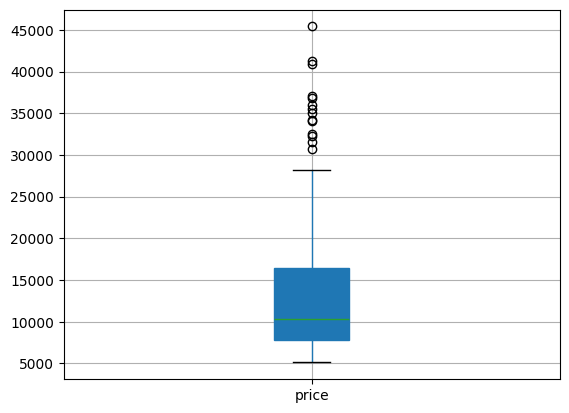

In [99]:
#distribuição da variavel price - boxplot

carros3.boxplot(column='price', patch_artist=True)

#Podemos concluir que a variável price apresenta: Uma mediana em torno de 10.000. Muitos outliers acima do limite superior, até cerca de 45.000 Assimetria positiva à direita. Intervalo interquartil entre 7.500 e 16.000.Limite inferior: 5000. Limite superior: +/- 28000.

Linha 2

In [100]:
#variavel para analise: + analise grafico de barras + tabela frequencias

#tabela frequencias
freq_tab = carros3['fuel-type'].value_counts()
print(freq_tab)

fuel-type
gas       179
diesel     20
Name: count, dtype: int64


Linha 3

<Axes: xlabel='fuel-type'>

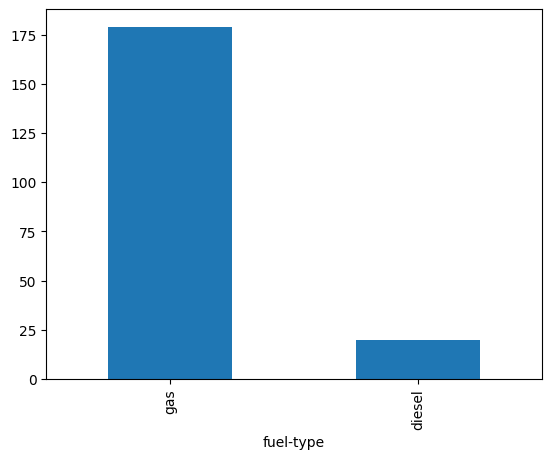

In [101]:
#criar grafico de barras + pie chart
freq_tab.plot(kind='bar')


<Axes: ylabel='count'>

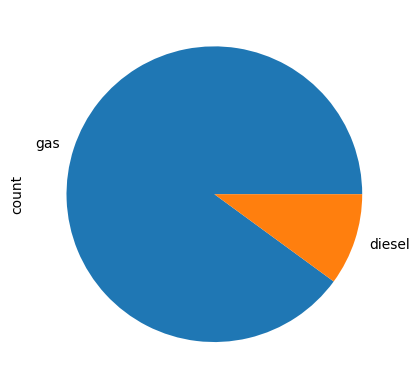

In [102]:
freq_tab.plot.pie()

Linha 4

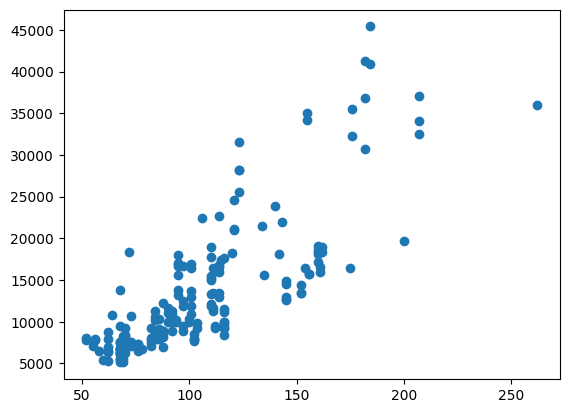

In [103]:
#explorar acatter plot com horsepower e price - que tipo de relaçao apresentam?
plt.scatter(carros3['horsepower'], carros3['price'])

#podemos concluir que a relação entre as variaveis horsepower e price é, na sua maioria, positiva, ou seja, quanto mais horsepower tem o carro mais aumenta o price.
#Esta relação não é totalmente linear, no sentido em que existem alguns casos em que,comparativamente, a potencia é baixa e o preço alto, ou vice-versa.
#Algumas razoes que podem influenciar esta variância: marca do carro, tipo de combustiveis, curb-weight, engine-size etc.

Linha 5

<Axes: >

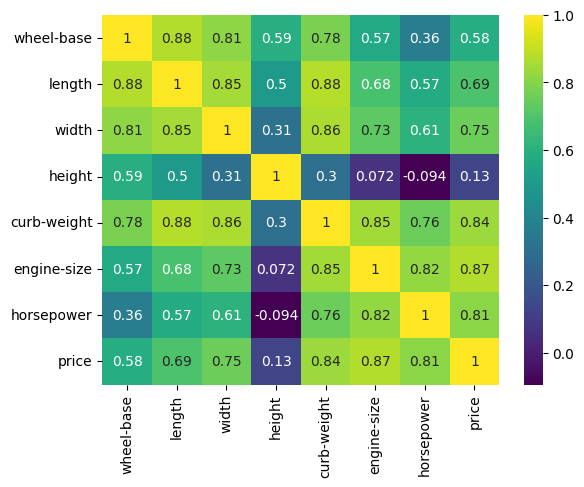

In [104]:
#heatmap para relação entre todas as variaveis quantitativas

correl_quantitativas = carros3[['wheel-base','length','width','height','curb-weight','engine-size','horsepower','price']].corr()
sns.heatmap(correl_quantitativas, annot=True, cmap='viridis')

#Podemos concluir que algumas variaveis tem uma correlaçao elevada entre si.
#De forma positiva, por exemplo: lenght com wheel-base, width e curb-weight. Price com engine-size, curb-weight e horsepower
#O que significa que a medida que uma variável aumenta, a outra também tende a aumentar de forma consistente. Nesta análise a correlação mais forte é entre lenght e wheel-base.
#Valores mais proximos de zero, por exemplo: height com engine-size e horsepower.
#Indica que xiste uma relação linear muito fraca (quase inexistente) entre as variáveis.
#De forma geral é possivel concluir que existe uma correlação positiva, acima de 0,60, entre grande parte das variáveis. Sendo que algumas apresentam valores acima de 0,80.